# ФосАгро (PHOR)

In [1]:
company = 'RHOR'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dt = pd.read_csv('../data.csv', index_col=0)
dt = dt.sort_index()

In [4]:
dt

,revenue,cost_price,assets,capital,net_profit,dividend,n_shares,share_price
2015,1.897000e+11,8.310000e+10,2.165000e+11,6.000000e+10,3.640000e+10,1.810000e+10,129500000.0,2821.0
2016,1.877000e+11,8.800000e+10,2.292000e+11,8.830000e+10,4.290000e+10,2.800000e+10,129500000.0,2599.0
2017,1.814000e+11,1.014000e+11,2.516000e+11,9.810000e+10,2.120000e+10,1.050000e+10,129500000.0,2499.0
2018,2.333120e+11,1.240080e+11,2.862230e+11,1.098210e+11,4.170000e+10,2.490000e+10,129500000.0,2546.0
2019,2.481250e+11,1.362240e+11,3.026210e+11,1.256370e+11,3.710000e+10,2.490000e+10,129500000.0,2652.0


In [5]:
dt['obligations'] = dt['assets'] - dt['capital']
dt['capitalization'] = dt['n_shares']*dt['share_price']

## Динамика выручки, капитала, обязательств, активов

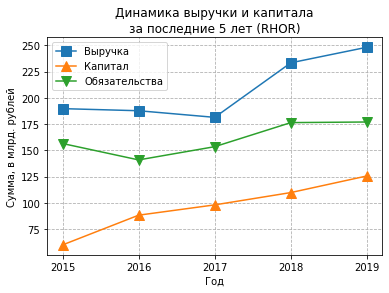

In [9]:
plt.plot(dt.index, dt['revenue']*1e-9, marker='s', ms=10, label='Выручка')
plt.plot(dt.index, dt['capital']*1e-9, marker='^', ms=10, label='Капитал')
plt.plot(dt.index, dt['obligations']*1e-9, marker='v', ms=10, label='Обязательства')
plt.xticks([2015, 2016, 2017, 2018, 2019], [2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.title(f'Динамика выручки и капитала\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд. рублей')
plt.grid(ls='--')
# plt.savefig('../revenue.png', dpi=200)

Выручка за 5 лет выросла, значит бизнес растёт и больше продаёт год за годом.
Также растут активы, что видно на рисунке ниже, что также говорит о росте бизнеса.

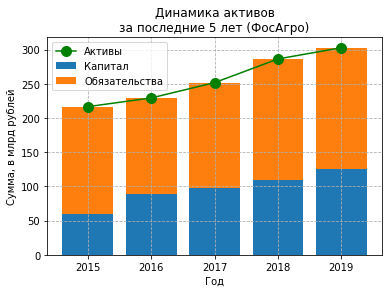

In [10]:
plt.plot(dt.index, dt['assets']*1e-9, marker='o', ms=10, label='Активы', c='g')
plt.bar(dt.index, dt['capital']*1e-9, label='Капитал')
plt.bar(dt.index, dt['obligations']*1e-9, bottom=dt['capital']*1e-9, label='Обязательства')
plt.xticks([2015, 2016, 2017, 2018, 2019], [2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.title('Динамика активов\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
# plt.savefig('../assets.png', dpi=200)

Теперь смотрим на зависимость чистой прибыли

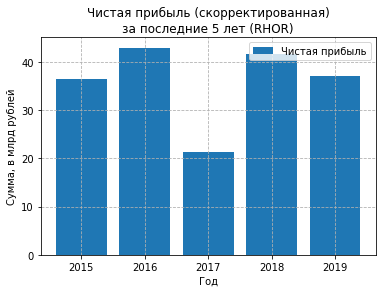

In [11]:
name = "Чистая прибыль (скорректированная)"
# plt.plot(dt.index, dt['net_profit']*1e-9, marker='o', ms=10, label='Чистая прибыль')
plt.bar(dt.index, dt['net_profit']*1e-9, label='Чистая прибыль')
plt.xticks(dt.index, dt.index.astype('str'))
plt.legend()
plt.title(f'{name}\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
# plt.savefig('../net_profit.png', dpi=200)

Чистая прибыль не растёт, несмотря на рост бизнеса. Некруто.

В отчёте за 2017 год написано, что снижение показателей обусловлено укреплением рубля в этом году.

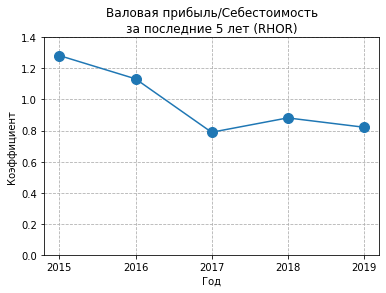

In [12]:
name = "Валовая прибыль/Себестоимость"
plt.plot(dt.index, dt['revenue']/dt['cost_price'] - 1, marker='o', ms=10, label=name)
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.ylim(0, 1.4)
plt.title(f'{name}\nза последние 5 лет ({company})')
plt.xlabel('Год')
plt.ylabel('Коэффициент')
plt.grid(ls='--')
# plt.savefig('../revenue_cost_price.png', dpi=200)

Соотношение валовой прибыли к себестоимости упало за последние пять лет, что не очень здорово, но возможно из-за этого при увеличении выручки чистая прибыль не растёт.

Теперь посмотрю детальнее на выручку

In [13]:
sales_structure = \
pd.Series([72.372, 34.836, 46.576, 94.341], index=['Европа','Южная Америка', 'Прочий экспорт', 'Россия+СНГ'])

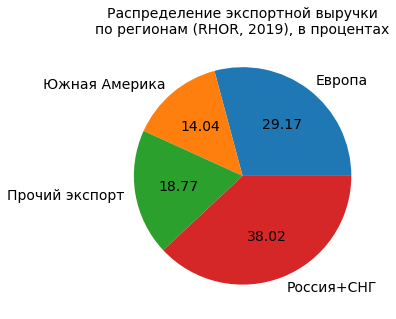

In [15]:
sales_structure.plot(kind='pie', subplots=False, figsize=(5, 5), autopct='%.2f', fontsize=14)
plt.title(f"Распределение экспортной выручки\nпо регионам ({company}, 2019), в процентах", fontsize=14)
plt.ylabel("");
# plt.savefig('../revenue_export.png', dpi=200)

На диаграмме видим приличную долю экспорта (исключая страны СНГ), которая достигает 60%

In [16]:
sales_structure2 = \
pd.Series([201.248, 37.882, 8.995], 
          index=['Фосфорсодержащая\nпродукция','Азотсодержащая\nпродукция', 'Прочая выручка'])

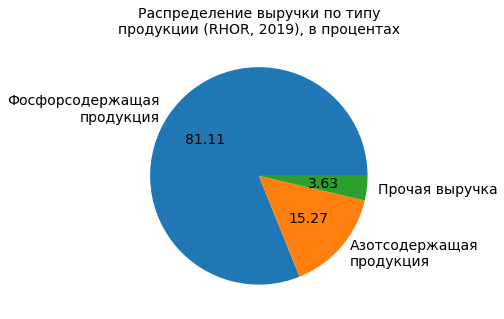

In [17]:
sales_structure2.plot(kind='pie', subplots=False, figsize=(5, 5), autopct='%.2f', fontsize=14)
plt.title(f"Распределение выручки по типу\nпродукции ({company}, 2019), в процентах", fontsize=14)
plt.ylabel("");
# plt.savefig('../revenue_kind.png', dpi=200)

Как и ожидалось, основная выручка идёт из продаж фосфорсодержащей продукции, в которую входит куча разных наименований.

## Дополнительные факторы

1. *Рыночный риск*
    (Колебания валюты могут повлиять на прибыль --> производится политика хэджирования)
    
1. *Сезонность бизнеса*
    (Спрос на продукцию колеблется в течение года --> компания продаёт продукцию в разных регионах)

## Дивидендная политика

Совет директоров стремится к тому, чтобы сумма средств, направляемых на выплату дивидендов, составила от 50% до более чем 75% от  консолидированного  свободного  денежного  потока  компании  за соответствующий период по МСФО

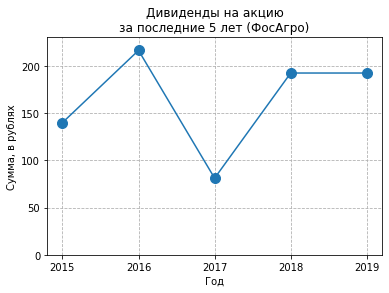

In [19]:
name = "Дивиденды на акцию"
plt.plot( dt.index, dt['dividend']/dt['n_shares'], marker='o', ms=10, label='Дивиденды/акция' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.ylim(0, 230)
plt.xlabel('Год')
plt.ylabel('Сумма, в рублях')
plt.grid(ls='--')
# plt.savefig('../dividend_share.png', dpi=200)

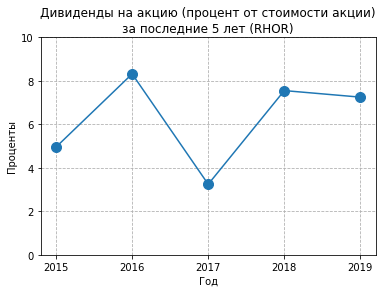

In [20]:
name = "Дивиденды на акцию (процент от стоимости акции)"
plt.plot( dt.index, 100*dt['dividend']/dt['n_shares']/dt['share_price'], marker='o', ms=10, label='' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет ({company})')
plt.ylim(0, 10)
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')
# plt.savefig('../dividend_share_percent.png', dpi=200)

Компания постоянно платит дивиденды, что радует

## ROA

Отвечает на вопрос, выгоднее ли "владельцу" всё продать и положить деньги на депозит?

In [21]:
assets = dt['assets'].values
mean_assets = (assets[:-1] + assets[1:])/2

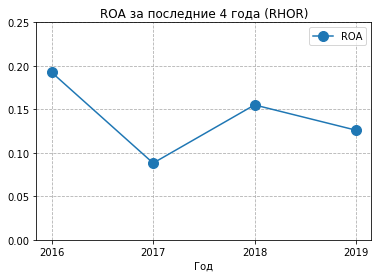

In [23]:
name = "ROA"
plt.plot( dt.index[1:], dt['net_profit'][1:]/mean_assets, marker='o', ms=10, label=name )
plt.xticks(dt.index[1:], dt.index[1:].astype('str'))
plt.legend()
plt.ylim(0, 0.25)
plt.title(f'{name} за последние 4 года ({company})')
plt.xlabel('Год')
plt.grid(ls='--')
# plt.savefig('../ROA.png', dpi=200)

Высокий показатель ROA относительно среднего по отрасли 5.04 согласно MSN финансы), здорово.
Управляют организацией хорошо

## Оценка компании

Теперь, пользуясь мультипликаторами, можно попробовать проверить, недооценена или переоценена компания на бирже

### Капитализация PHOR

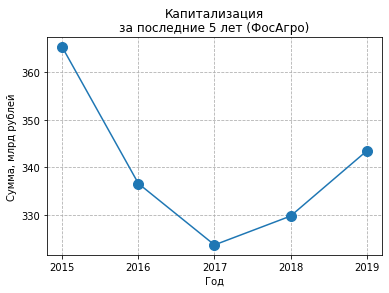

In [24]:
name = "Капитализация"
plt.plot( dt.index, dt['capitalization']*1e-9, marker='o', ms=10, label='Капитализация' )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
plt.ylabel('Сумма, млрд рублей')
plt.grid(ls='--')
# plt.savefig('../capitalization.png', dpi=200)

### P/E
Через сколько лет окупится инвестиция, если прибыль останется на том же уровне и всю прибыль руководство направит на дивиденды

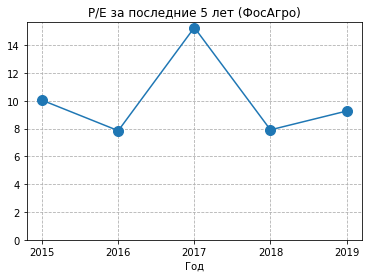

In [26]:
name = "P/E"
plt.plot( dt.index, dt['capitalization']/dt['net_profit'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name} за последние 5 лет (ФосАгро)')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../PE.png', dpi=200)

Довольно большое значение, но возможно нормальное для данной отрасли, поэтому нужно посмотреть другие компании оттуда

### P/S
Отношение рыночной капитализации компании к её годовой выручке. 
Показатель <1 может говорить о недооценённости компании

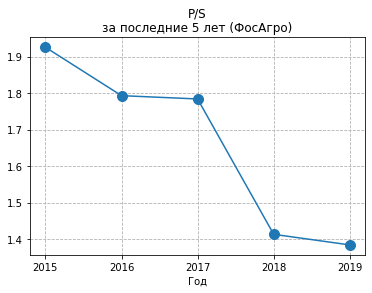

In [27]:
name = "P/S"
plt.plot( dt.index, dt['capitalization']/dt['revenue'], marker='o', ms=10, label=name )
plt.xticks(dt.index, dt.index.astype('str'))
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
# plt.ylabel('')
# plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../PS.png', dpi=200)

P/S соответствует среднему по отрасли 1.42 (MSN финансы)

### EV/EBITDA

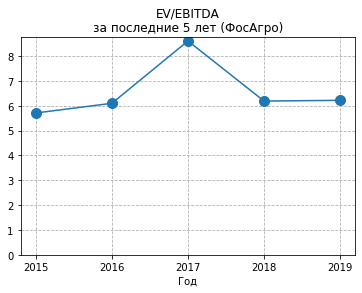

In [29]:
name = 'EV/EBITDA'
years = ['2015', '2016', '2017', '2018', '2019']
ev_ebitda = [5.71, 6.10, 8.61, 6.19, 6.22]
plt.plot(years, ev_ebitda, marker='o', ms=10, label=name )
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
# plt.ylabel('')
plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../EV_EBITDA.png', dpi=200)

Довольно большой показатель, но опять же возможно из-за специфики бизнеса, поэтому нужно понять, что там у конкурентов

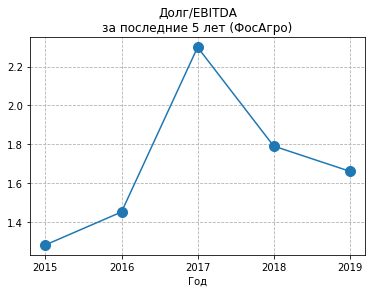

In [31]:
name = 'Долг/EBITDA'
debt_ebitda = [1.28, 1.45, 2.30, 1.79, 1.66]
plt.plot(years, debt_ebitda, marker='o', ms=10, label=name )
# plt.legend()
plt.title(f'{name}\nза последние 5 лет (ФосАгро)')
plt.xlabel('Год')
# plt.ylabel('')
# plt.ylim(0, None)
plt.grid(ls='--')
# plt.savefig('../Debt_EBITDA.png', dpi=200)

## Планы на будущее

1. Продвижение продуктовой линейки на премиальных рынках за рубежом
1. Повышение самообеспеченности минеральными ресурсами 
1. Расширение производственных мощностей
1. Оптимизация производства
1. Внедрение "зелёных" технологий

т.е. ничего конкретного

1. Участие в программе для развития социально-ориентированного бизнеса ООН

## Вывод

У компании ФосАгро растёт выручка, она наращивает капитал, при этом стабильно платит дивиденды.

Обладает преимуществом производства в России и экспорта в Европу.

Но пока что кажется переоценённой, скорее всего стоимость её акций не увеличится, но как уже говорилось, есть дивиденды